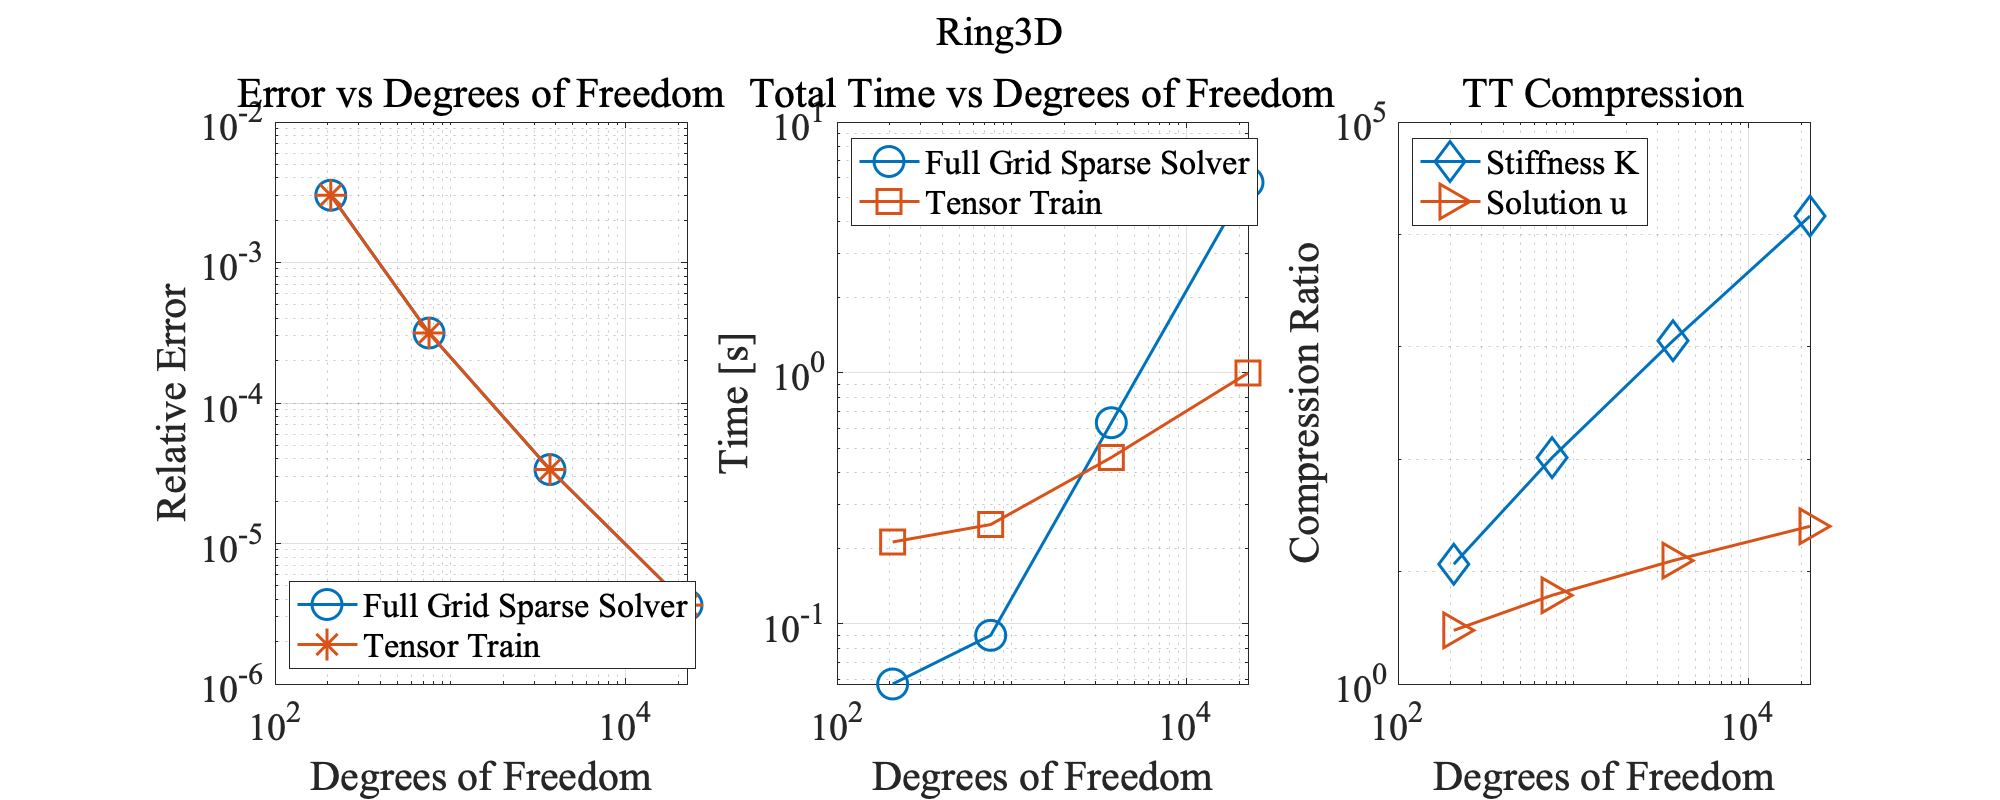

In [1]:
close all; clear; clc;

% Load data
datafg = readmatrix("Ring3D_fg.csv");
datatt = readmatrix("Ring3D_tt.csv");

% Extract degrees of freedom and relevant quantities
fg_dof = prod(datafg(:,[1,2,3]),2);
fg_time = datafg(:,4);
fg_err = datafg(:,5);

tt_dof = prod(datatt(:,[1,2,3]),2);
tt_K_comp = datatt(:,6);
tt_u_comp = datatt(:,8);
tt_time = datatt(:,4);
tt_err = datatt(:,5);

%% Plotting
%% format figures
set(0,'defaultfigurecolor','w');
set(0,'DefaultAxesTitleFontWeight','normal');
set(0,'DefaultAxesFontSize',20)
set(0,'DefaultAxesFontName','Times New Roman');
set(0,'DefaultLineMarkerSize',15)
% set(0,'DefaultLineMarkerSize',50)
set(0,'defaultLineLineWidth',1.5);
% set(0,'defaultMarkerSize',5);
set(0,'defaultTextFontName', 'Times New Roman')
set(0, 'DefaultFigureRenderer', 'painters');
set(0,'defaultAxesXGrid','on')
set(0,'defaultAxesYGrid','on')

%%
figure('Name','Ring3D IGA: Full Grid vs Tensor Train','Color','w');
sgtitle('Ring3D', 'FontSize', 20);
% 1. Error vs DoF
subplot(1,3,1)
loglog(fg_dof, fg_err, 'o-', 'LineWidth', 1.5); hold on;
loglog(tt_dof, tt_err, '*-', 'LineWidth', 1.5);
xlabel('Degrees of Freedom');
ylabel('Relative Error');
title('Error vs Degrees of Freedom');
legend('Full Grid Sparse Solver','Tensor Train','Location','southwest');
grid on;

% 2. Time vs DoF
subplot(1,3,2)
loglog(fg_dof, fg_time, 'o-', 'LineWidth', 1.5); hold on;
loglog(tt_dof, tt_time, 's-', 'LineWidth', 1.5);
xlabel('Degrees of Freedom');
ylabel('Time [s]');
title('Total Time vs Degrees of Freedom');
legend('Full Grid Sparse Solver','Tensor Train','Location','northwest');
grid on;

% 3. TT Compression (K and u)
subplot(1,3,3)
loglog(tt_dof, tt_K_comp, 'd-', 'LineWidth', 1.5); hold on;
loglog(tt_dof, tt_u_comp, '>-', 'LineWidth', 1.5);
xlabel('Degrees of Freedom');
ylabel('Compression Ratio');
title('TT Compression');
legend('Stiffness K','Solution u','Location','northwest');
grid on;

set(gcf, 'Position', [0, 0, 1000, 400]);